### Importowanie bibliotek

In [1]:
from nn.warstwy import Warstwa

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline


### Importowanie danych

In [2]:
dane = pd.read_csv('/Users/majkamiezianko/PycharmProjects/scientificProject1/heart.csv')

opis_kolumn={'age':'age',
             'sex':'gender',
             'cp':'chest pain type',
             'trestbps':'resting blood presure',
             'chol': 'cholesterol level',
             'fbs': 'fasting blood sugar',
             'restecg':'resting electrocardiographic results',
             'thalach':'maximum heart rate',
             'exang' : 'exercise including angina',
             'oldpeak':'ST depression',
             'slope':'slope of ST exercise',
             'ca':'number of major vessels',
             'thal':'defect in heart',
             'target': 'disease or not'
            }

dane.head()
dane.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


### Sprawdzanie, czy występują braki danych

In [3]:
dane.isna().sum()


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

### Statystyka opisowa

In [4]:
dane.describe()
dane.target.value_counts()

1    165
0    138
Name: target, dtype: int64

Możemy zauwazyć, że ten zbiór danych zawiera 303 obserwacje i nie ma w nich braków danych.
Wyróżniamy w nim łącznie 13 features (czynników objaśniających) oraz jedną kolumnę, która
jest targetem, czyli zmienną zero-jedynkową. Zero oznacza brak choroby serca (138 obserwacji), zaś jeden występowanie
choroby serca (165 obserwacji).


Warto również zwrócić uwagę, że skala zmiennych jest zróżnicowana — podczas gdy maksymalna wartość
'age' wynosi 77, maksymalna wartość 'chol' równa się 256.



### Wizualizacja danych
W celu lepszego zrozumienia oraz objaśnienia datasetu wykonamy poniżej wizualizację danych.

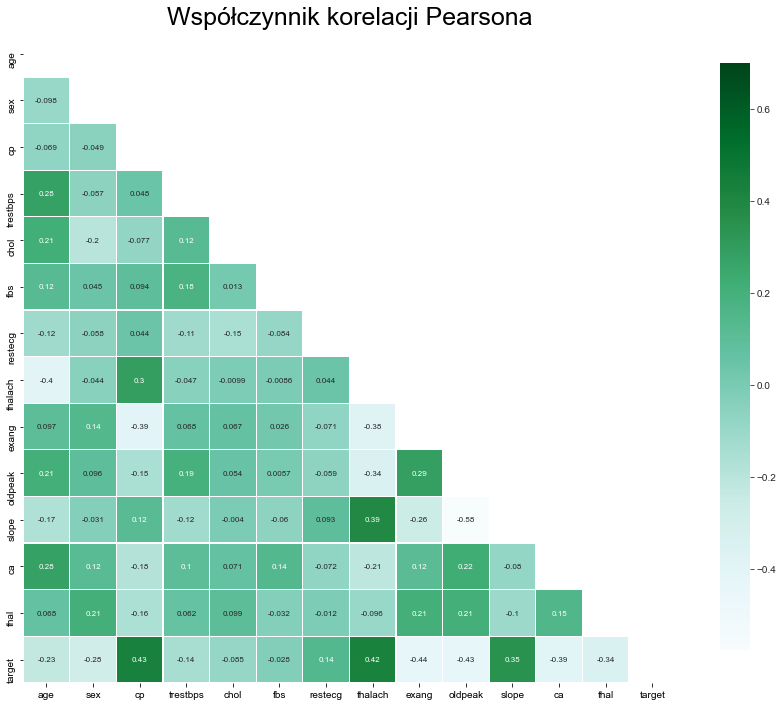

In [5]:
czynniki = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal','target']

mask = np.zeros_like(dane[czynniki].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(16, 12))
plt.title('Współczynnik korelacji Pearsona',fontsize=25)

sns.set_style('darkgrid')
sns.heatmap(dane[czynniki].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});

Zauważamy, że najbardziej skorelowane z targetem są zmienne:
* cp
* thalach
* exang
* oldpeak
* slope
* ca
* tha

Najbardziej skorelowane pomiędzy sobą są zaś zmienne:

* slope - oldpeak
* slope - thalach
* thalach - oldpeak
* thalach - exang
* thalach - age
* exang - cp


Sprawdzamy jaki jest rozkład Y - targetu wśród poszczególnych czynników

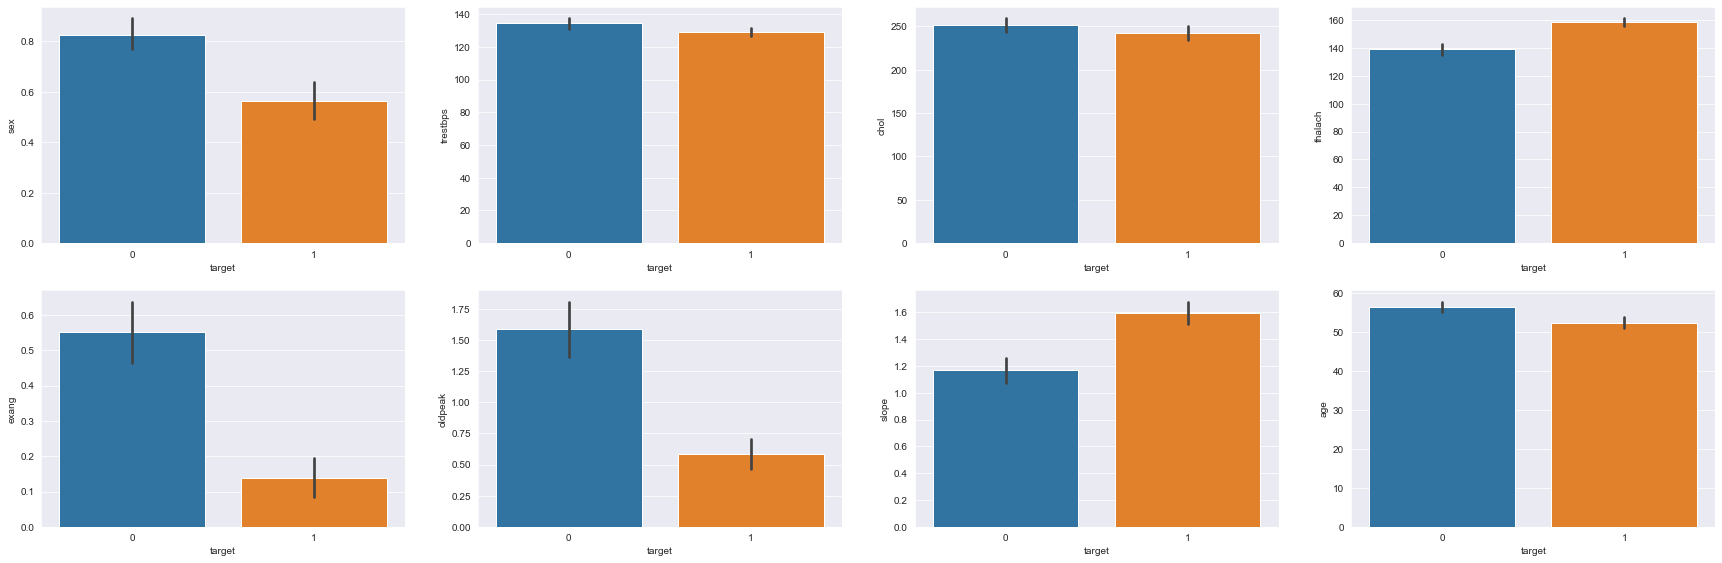

<Figure size 432x288 with 0 Axes>

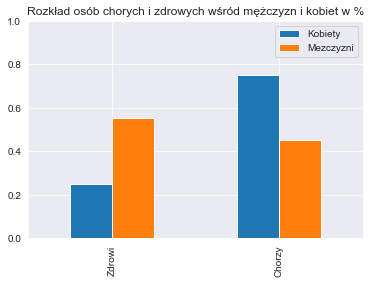

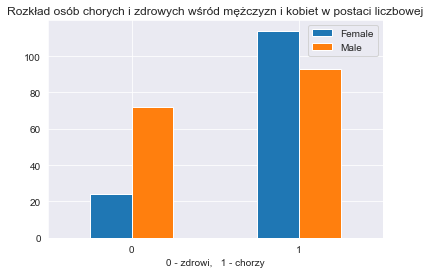

In [6]:
plt.figure(figsize=(30,20))

plt.subplot(4,4,1)
sns.barplot(x = 'target', y = 'sex', data = dane)

plt.subplot(4,4,2)
sns.barplot(x = 'target', y = 'trestbps', data = dane)

plt.subplot(4,4,3)
sns.barplot(x = 'target', y = 'chol', data = dane)


plt.subplot(4,4,4)
sns.barplot(x = 'target', y = 'thalach', data = dane)

plt.subplot(4,4,5)
sns.barplot(x = 'target', y = 'exang', data = dane)

plt.subplot(4,4,6)
sns.barplot(x = 'target', y = 'oldpeak', data = dane)

plt.subplot(4,4,7)
sns.barplot(x = 'target', y = 'slope', data = dane)

plt.subplot(4,4,8)
sns.barplot(x = 'target', y = 'age', data = dane)

#Drugi wykres

ax=plt.figure();
dane_kobiety=dane.loc[dane['sex']==0]
kobiety_chore=len(dane_kobiety.loc[dane_kobiety['target']==1])/len(dane_kobiety)
kobiety_zdrowe=len(dane_kobiety.loc[dane_kobiety['target']==0])/len(dane_kobiety)

dane_mezczyzni=dane.loc[dane['sex']==1]
mezczyzni_chorzy=len(dane_mezczyzni.loc[dane_mezczyzni['target']==1])/len(dane_mezczyzni)
mezczyzni_zdrowi=len(dane_mezczyzni.loc[dane_mezczyzni['target']==0])/len(dane_mezczyzni)

kobiety={'Zdrowi':kobiety_zdrowe, 'Chorzy':kobiety_chore}
mezczyzni={'Zdrowi':mezczyzni_zdrowi, 'Chorzy':mezczyzni_chorzy}
plec_porownanie = pd.DataFrame({'Kobiety':kobiety,'Mezczyzni':mezczyzni})
plec_porownanie.plot.bar(title='Rozkład osób chorych i zdrowych wśród mężczyzn i kobiet w %',ylim=(0,1))

pd.crosstab(dane['sex'],dane['target']).plot(kind='bar',title='Rozkład osób chorych i zdrowych wśród mężczyzn i kobiet w postaci liczbowej');
plt.legend(['Female','Male']);
plt.xlabel("0 - zdrowi,   1 - chorzy");
plt.xticks(rotation=0);

Możemy zauważyć z powyższych wykresów, że więcej kobiet niż mężczyzn zachorowało na choroby
serca.

Histogramy zmiennych:


/Users/majkamiezianko/.conda/envs/untitled2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/majkamiezianko/.conda/envs/untitled2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/majkamiezianko/.conda/envs/untitled2/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either 

Text(0.5, 1.0, 'Age Interval')

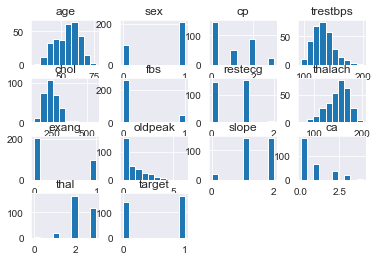

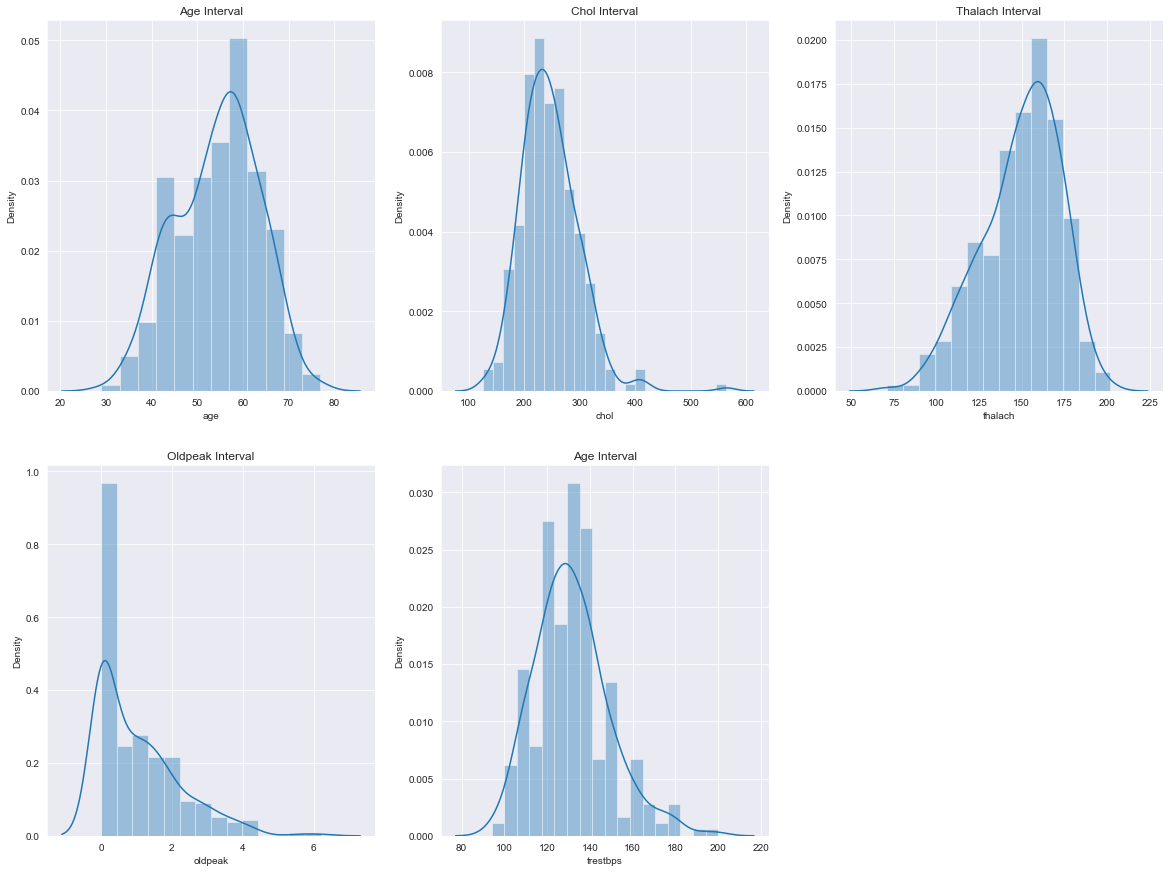

In [7]:
dane.hist()

plt.figure(figsize=(20,15))


plt.subplot(2,3,1)
sns.distplot(dane['age']).set_title('Age Interval')

plt.subplot(2,3,2)
sns.distplot(dane['chol']).set_title('Chol Interval')

plt.subplot(2,3,3)
sns.distplot(dane['thalach']).set_title('Thalach Interval')

plt.subplot(2,3,4)
sns.distplot(dane['oldpeak']).set_title('Oldpeak Interval')

plt.subplot(2,3,5)
sns.distplot(dane['trestbps']).set_title('Age Interval')

In [8]:
from copy import  deepcopy
dane_kopia = deepcopy(dane)
kategorie = ['cp', 'ca', 'slope', 'thal']
for kategoria in kategorie:
    hot_encoded = pd.get_dummies(dane[kategoria], prefix= kategoria)
    dane = pd.concat([dane,hot_encoded],axis=1)
dane = dane.drop(columns=kategorie,axis=1)
dane.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target,...,ca_2,ca_3,ca_4,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,63,1,145,233,1,0,150,0,2.3,1,...,0,0,0,1,0,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,1,...,0,0,0,1,0,0,0,0,1,0
2,41,0,130,204,0,0,172,0,1.4,1,...,0,0,0,0,0,1,0,0,1,0
3,56,1,120,236,0,1,178,0,0.8,1,...,0,0,0,0,0,1,0,0,1,0
4,57,0,120,354,0,1,163,1,0.6,1,...,0,0,0,0,0,1,0,0,1,0


Standaryzacja danych

In [9]:
dane = dane.astype('float32')

dane.dtypes

kategorie = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak','restecg']
for kategoria in kategorie:
    dane[kategoria]= dane[kategoria].apply(lambda x: x-dane[kategoria].min())
    dane[kategoria]= dane[kategoria].apply(lambda x: x/dane[kategoria].max())
dane.describe()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target,...,ca_2,ca_3,ca_4,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,...,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.528465,0.683168,0.354941,0.274575,0.148515,0.264026,0.600358,0.326733,0.167678,0.544554,...,0.125413,0.066007,0.016502,0.069307,0.462046,0.468647,0.006601,0.059406,0.547855,0.386139
std,0.189210,0.466011,0.165454,0.118335,0.356198,0.262930,0.174849,0.469794,0.187270,0.498835,...,0.331734,0.248704,0.127605,0.254395,0.499382,0.499842,0.081110,0.236774,0.498528,0.487668
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385417,0.000000,0.245283,0.194064,0.000000,0.000000,0.477099,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.541667,1.000000,0.339623,0.260274,0.000000,0.500000,0.625954,0.000000,0.129032,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.666667,1.000000,0.433962,0.339041,0.000000,0.500000,0.725191,1.000000,0.258065,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
dane.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,target,...,ca_2,ca_3,ca_4,slope_0,slope_1,slope_2,thal_0,thal_1,thal_2,thal_3
0,0.708333,1.0,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.166667,1.0,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.250000,0.0,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.562500,1.0,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.583333,0.0,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


(242, 25) (303, 26) (61,)
(242, 25) (242, 1)
0.4542199393237812


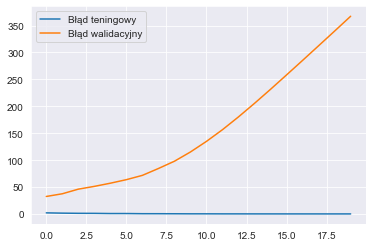

In [11]:
from nn.fully_connected import WarstwaFC
from nn.funkcje_aktywacji import *
from nn.warstwa_aktywacji import WarstwaAktywacji
from nn.optymalizatory import AdamOptymalizator
from nn.funkcje_celu import MSE, BinaryCrossEntropy
from nn.siec import *
from nn.funkcje_pomocnicze import train_test_split
dane_gotowe = dane.to_numpy()
x_train, y_train, x_test, y_test = train_test_split(dane_gotowe,0.2)

print(x_train.shape,dane_gotowe.shape,y_test.shape)


#x_train = np.expand_dims(x_train, axis=1)
y_train = np.expand_dims(y_train, axis=1)
print(x_train.shape, y_train.shape)
#===============================================================



net = Siec()
net.dodaj_warstwe(WarstwaFC(25, 64, optymalizator=AdamOptymalizator()))
net.dodaj_warstwe(WarstwaAktywacji(sigmoid, derr_sigmoid))
net.dodaj_warstwe(WarstwaFC(64, 64, optymalizator=AdamOptymalizator()))
net.dodaj_warstwe(WarstwaAktywacji(sigmoid, derr_sigmoid))
net.dodaj_warstwe(WarstwaFC(64, 1, optymalizator=AdamOptymalizator()))
net.dodaj_warstwe(WarstwaAktywacji(sigmoid, derr_sigmoid))

m = MSE()
bin_cross_entropy = BinaryCrossEntropy()

# train
net.ust_f_celu(bin_cross_entropy.funk, bin_cross_entropy.derr)
historia = net.trenuj(x_train, y_train,
                      iteracje=20,
                      lrn_rate=0.01,
                      proc_walidacyjny=0.2,
                      batch_size= 32)

# test
out = net.predykcja(x_train)
import matplotlib.pyplot as plt
plt.plot(historia['blad_trening'], scaley = True)
plt.plot(historia['blad_walidacji'], scaley = True)
plt.legend(['Błąd teningowy', 'Błąd walidacyjny'])
#plt.ylim([0,1.5])
plt.show()


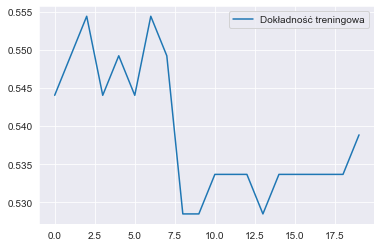

(61, 1)

In [14]:
plt.plot(historia['dokładnosc_treningowa'], scaley = True)
#plt.plot(historia['dokładnosc_walidacji'], scaley = True)
plt.legend(['Dokładność treningowa', 'Dokładność walidacyjna'])
#plt.ylim([0,1.5])
plt.show()
np.array(net.predykcja(x_test)).shape

In [13]:
x_test.shape

(61, 25)